**Jacob Valdenegro Monzón A01640992**

Aqui cargo el archivo y lo normalizo

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Cargar el archivo Excel
file_path = '1.4Ejercicio.xlsx'  # Cambia esto por la ruta a tu archivo
df = pd.read_excel(file_path)

# Seleccionar todas las columnas excepto 'Índice pronóstico' y 'Sobrevivencia (días)' para normalizar
columns_to_normalize = df.columns.drop(['Sobrevivencia\n(días)', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'])

# Inicializar el escalador
scaler = MinMaxScaler()

# Aplicar la normalización en todas las columnas menos 'Índice pronóstico' y 'Sobrevivencia (días)'
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# No normalizamos la columna 'Índice pronóstico', solo la leemos
indice_pronostico = df['Índice pronóstico']

# Guardar el DataFrame normalizado en un nuevo archivo Excel
df.to_excel('archivo_normalizado.xlsx', index=False)



In [103]:
import pandas as pd

# Cargar los datos desde el archivo de Excel
file_path = 'archivo_normalizado.xlsx'

#file_path = '1.4Ejercicio.xlsx'

df = pd.read_excel(file_path)

# Mostrar las primeras filas del dataset
print(df.head())


   Factor Coagulación  Índice pronóstico  Función de enzima  \
0            0.476744           0.593407           0.604167   
1            0.290698           0.560440           0.447917   
2            0.558140           0.538462           0.625000   
3            0.453488           0.714286           0.187500   
4            0.604651           0.626374           0.958333   

   Función de hígado   Edad  Género  Alcohol\n(moderado)  Alcohol\n(severo)  \
0           0.326855  0.500       0                    1                  0   
1           0.169611  0.225       0                    0                  0   
2           0.250883  0.625       0                    0                  0   
3           0.224382  0.450       0                    0                  0   
4           0.628975  0.375       0                    0                  1   

   Sobrevivencia\n(días)  Unnamed: 9  Unnamed: 10  \
0                    695         NaN          NaN   
1                    403         NaN    

Transformar Variables

In [104]:
# Convertir variables categóricas a tipo 'category'
df['Género'] = df['Género'].astype('category')
df['Alcohol\n(moderado)'] = df['Alcohol\n(moderado)'].astype('category')
df['Alcohol\n(severo)'] = df['Alcohol\n(severo)'].astype('category')

# Mostrar los datos transformados
print(df.head())


   Factor Coagulación  Índice pronóstico  Función de enzima  \
0            0.476744           0.593407           0.604167   
1            0.290698           0.560440           0.447917   
2            0.558140           0.538462           0.625000   
3            0.453488           0.714286           0.187500   
4            0.604651           0.626374           0.958333   

   Función de hígado   Edad Género Alcohol\n(moderado) Alcohol\n(severo)  \
0           0.326855  0.500      0                   1                 0   
1           0.169611  0.225      0                   0                 0   
2           0.250883  0.625      0                   0                 0   
3           0.224382  0.450      0                   0                 0   
4           0.628975  0.375      0                   0                 1   

   Sobrevivencia\n(días)  Unnamed: 9  Unnamed: 10  \
0                    695         NaN          NaN   
1                    403         NaN          NaN   
2    

In [105]:
# Renombrar las columnas para que sean más manejables
df.columns = ['Factor_Coagulacion', 'Indice_pronostico', 'Funcion_enzima', 'Funcion_higado', 'Edad', 'Genero', 'Alcohol_moderado', 'Alcohol_severo', 'Sobrevivencia_dias', 'no1', 'no2', 'no3']


Ajustar el Modelo de Regresión

In [106]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Definir la fórmula para el modelo de regresión
formula = 'Sobrevivencia_dias ~ Factor_Coagulacion + Indice_pronostico + Funcion_enzima + Funcion_higado + Edad + Genero + Alcohol_moderado + Alcohol_severo'

# Ajustar el modelo
modelo = smf.ols(formula, data=df).fit()

# Imprimir el resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:     Sobrevivencia_dias   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     42.69
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           8.70e-29
Time:                        20:52:44   Log-Likelihood:                -704.12
No. Observations:                 108   AIC:                             1426.
Df Residuals:                      99   BIC:                             1450.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -575.86

Algunas variables, como el Factor de Coagulación, el Índice Pronóstico, la Función de Enzima, la Función de Hígado, y el Alcohol Severo son predictoras altamente significativas de la supervivencia y variables como el Género, Alcohol Moderado, y Edad no son significativas, por lo que podría considerar eliminarlas para mejorar el modelo un poco. La R y R² es alta pero tal vez podria mejorar con este cambio.

Significativas (p < 0.05):
* Alcohol_severo
* Factor_Coagulacion
* Indice_pronostico
* Funcion_enzima
* Funcion_higado

No significativas (p >= 0.05):
* Genero
* Alcohol_moderado
* Edad

**Ajustar el Modelo con Variables Significativas**

In [107]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Definir la fórmula del modelo con las variables significativas
formula_significativa = 'Sobrevivencia_dias ~ Factor_Coagulacion + Indice_pronostico + Funcion_enzima + Funcion_higado + Alcohol_severo'

# Ajustar el modelo
modelo_significativo = smf.ols(formula_significativa, data=df).fit()

# Imprimir el resumen del modelo con variables significativas
print(modelo_significativo.summary())


                            OLS Regression Results                            
Dep. Variable:     Sobrevivencia_dias   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     69.01
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           3.63e-31
Time:                        20:52:49   Log-Likelihood:                -704.94
No. Observations:                 108   AIC:                             1422.
Df Residuals:                     102   BIC:                             1438.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -574.6300    

Revisar Interacciones o Términos Polinomiales

Interacciones

In [108]:
import statsmodels.formula.api as smf

# Definir la fórmula para el modelo con términos de interacción
formula_interacciones = 'Sobrevivencia_dias ~ Factor_Coagulacion * Indice_pronostico + Funcion_enzima + Funcion_higado + Alcohol_severo'

# Ajustar el modelo con términos de interacción
modelo_interacciones = smf.ols(formula_interacciones, data=df).fit()

# Imprimir el resumen del modelo con interacciones
print("Resumen del Modelo con Interacciones:")
print(modelo_interacciones.summary())


Resumen del Modelo con Interacciones:
                            OLS Regression Results                            
Dep. Variable:     Sobrevivencia_dias   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     57.08
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           2.89e-30
Time:                        20:52:52   Log-Likelihood:                -704.83
No. Observations:                 108   AIC:                             1424.
Df Residuals:                     101   BIC:                             1442.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

La adición de términos de interacción no ha mejorado significativamente el modelo en términos de R² o la significancia de los términos.

Términos Polinomiales

In [109]:
# Definir la fórmula para el modelo con términos polinomiales
formula_polynomial = 'Sobrevivencia_dias ~ I(Factor_Coagulacion**2) + Indice_pronostico + Funcion_enzima + Funcion_higado + Alcohol_severo'

# Ajustar el modelo con términos polinomiales
modelo_polynomial = smf.ols(formula_polynomial, data=df).fit()

# Imprimir el resumen del modelo con términos polinomiales
print("Resumen del Modelo con Términos Polinomiales:")
print(modelo_polynomial.summary())


Resumen del Modelo con Términos Polinomiales:
                            OLS Regression Results                            
Dep. Variable:     Sobrevivencia_dias   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     72.40
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           5.52e-32
Time:                        20:52:55   Log-Likelihood:                -702.93
No. Observations:                 108   AIC:                             1418.
Df Residuals:                     102   BIC:                             1434.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

La inclusión del término polinomial para Factor_Coagulacion ha aumentado el R² del modelo, lo que sugiere que el efecto cuadrático de Factor_Coagulacion es significativo y mejora el ajuste del modelo.

**Interpretar ANOVA, R², R² Ajustado, p-values y FIV**

ANOVA

In [110]:
import statsmodels.api as sm

# Realizar ANOVA
anova_results = sm.stats.anova_lm(modelo, typ=2)
print(anova_results)




                          sum_sq    df          F        PR(>F)
Genero              4.327453e+03   1.0   0.147256  7.019940e-01
Alcohol_moderado    3.371311e+04   1.0   1.147204  2.867394e-01
Alcohol_severo      4.485196e+05   1.0  15.262418  1.711682e-04
Factor_Coagulacion  3.825824e+05   1.0  13.018681  4.856290e-04
Indice_pronostico   1.502570e+06   1.0  51.130098  1.505711e-10
Funcion_enzima      2.276466e+06   1.0  77.464573  4.475716e-14
Funcion_higado      2.593271e+05   1.0   8.824495  3.729911e-03
Edad                5.769177e+03   1.0   0.196316  6.586777e-01
Residual            2.909332e+06  99.0        NaN           NaN


Conclusion de Anova

Las variables Alcohol severo, Factor de Coagulación, Índice pronóstico, Función enzimática, y Función hepática son significativas, con Índice pronóstico y Función enzimática siendo los predictores más fuertes.
Género, Alcohol moderado, y Edad no son significativos y podrían ser eliminados del modelo para simplificarlo.

R² y R² Ajustado

In [111]:
r_squared = modelo.rsquared
r_squared_adj = modelo.rsquared_adj

print(f'R²: {r_squared}')
print(f'R² Ajustado: {r_squared_adj}')

R²: 0.775278095890658
R² Ajustado: 0.7571187501040445


R² mide la proporción de la variabilidad en la variable dependiente (Sobrevivencia_dias). En este caso el R² ajustado es ligeramente menor pero sigue siendo relativamente alto.

p-values


p-values es crucial para determinar la significancia estadística de cada variable en el modelo de regresión, si es pequeño se concluye que esa variable tiene un efecto significativo sobre la variable dependiente, y su es mayor a que 0.05 se puede concluir que la variable no tiene un efecto significativo. Como lo comente anteriormente en el documento:

Significativas (p < 0.05):
* Alcohol_severo
* Factor_Coagulacion
* Indice_pronostico
* Funcion_enzima
* Funcion_higado

No significativas (p >= 0.05):
* Genero
* Alcohol_moderado
* Edad

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular el FIV para cada predictor
X = df[['Factor_Coagulacion', 'Indice_pronostico', 'Funcion_enzima', 'Funcion_higado', 'Edad', 'Genero', 'Alcohol_moderado', 'Alcohol_severo']]
X = sm.add_constant(X)  # Añadir un término constante a los predictores
fiv = pd.DataFrame()
fiv['Variable'] = X.columns
fiv['FIV'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(fiv)


             Variable        FIV
0               const  34.919843
1  Factor_Coagulacion   1.577947
2   Indice_pronostico   1.323686
3      Funcion_enzima   1.629249
4      Funcion_higado   2.401849
5                Edad   1.020800
6              Genero   1.068036
7    Alcohol_moderado   1.363438
8      Alcohol_severo   1.444596


Factor de Inflación de Varianza (FIV)

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular el FIV para cada predictor
X = df[['Factor_Coagulacion', 'Indice_pronostico', 'Funcion_enzima', 'Funcion_higado', 'Edad', 'Genero', 'Alcohol_moderado', 'Alcohol_severo']]
X = sm.add_constant(X)  # Añadir un término constante a los predictores
fiv = pd.DataFrame()
fiv['Variable'] = X.columns
fiv['FIV'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(fiv)


             Variable        FIV
0               const  34.919843
1  Factor_Coagulacion   1.577947
2   Indice_pronostico   1.323686
3      Funcion_enzima   1.629249
4      Funcion_higado   2.401849
5                Edad   1.020800
6              Genero   1.068036
7    Alcohol_moderado   1.363438
8      Alcohol_severo   1.444596


Verificar el Cumplimiento de los Supuestos


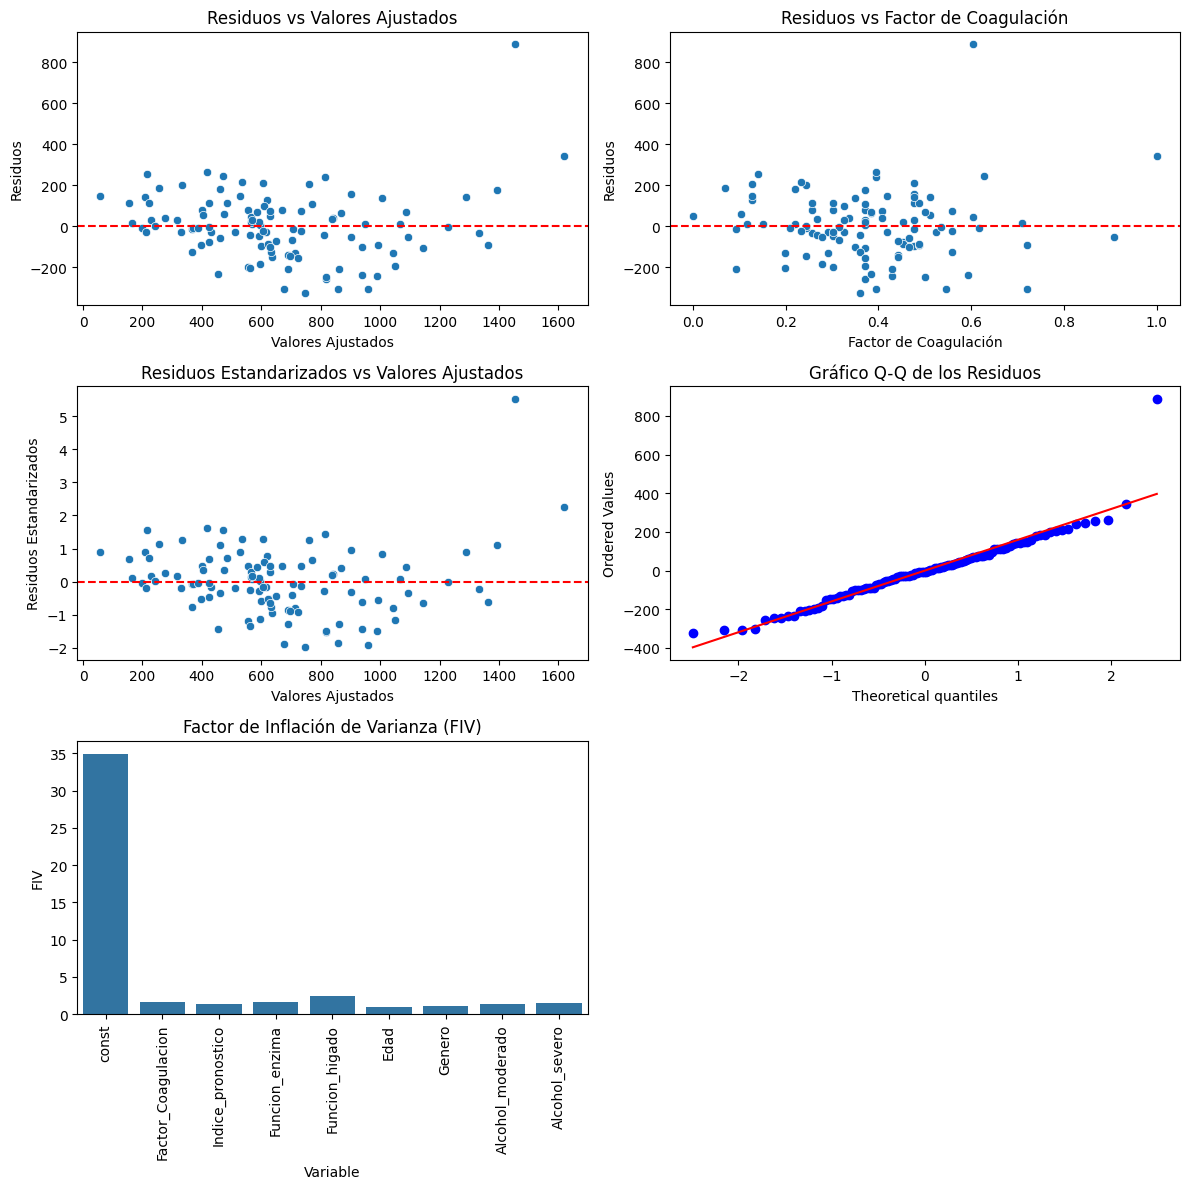

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Valores ajustados y residuos
valores_ajustados = modelo.fittedvalues
residuos = modelo.resid

plt.figure(figsize=(12, 12))

# Gráfico 1: Residuos vs Valores Ajustados
plt.subplot(3, 2, 1)
sns.scatterplot(x=valores_ajustados, y=residuos)
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados')
plt.axhline(0, linestyle='--', color='red')

# Gráfico 2: Residuos vs Variable Independiente (Factor_Coagulacion)
plt.subplot(3, 2, 2)
sns.scatterplot(x=df['Factor_Coagulacion'], y=residuos)
plt.xlabel('Factor de Coagulación')
plt.ylabel('Residuos')
plt.title('Residuos vs Factor de Coagulación')
plt.axhline(0, linestyle='--', color='red')

# Gráfico 3: Residuos Estandarizados vs Valores Ajustados
influence = modelo.get_influence()
residuos_estandarizados = influence.resid_studentized_internal

plt.subplot(3, 2, 3)
sns.scatterplot(x=valores_ajustados, y=residuos_estandarizados)
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos Estandarizados')
plt.title('Residuos Estandarizados vs Valores Ajustados')
plt.axhline(0, linestyle='--', color='red')

# Gráfico 4: Gráfico Q-Q de los Residuos
plt.subplot(3, 2, 4)
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los Residuos')

# Gráfico 5: FIV (Factor de Inflación de Varianza)
X = df[['Factor_Coagulacion', 'Indice_pronostico', 'Funcion_enzima', 'Funcion_higado', 'Edad', 'Genero', 'Alcohol_moderado', 'Alcohol_severo']]
X = sm.add_constant(X)  # Añadir un término constante a los predictores
fiv = pd.DataFrame()
fiv['Variable'] = X.columns
fiv['FIV'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

plt.subplot(3, 2, 5)
sns.barplot(x='Variable', y='FIV', data=fiv)
plt.xlabel('Variable')
plt.ylabel('FIV')
plt.title('Factor de Inflación de Varianza (FIV)')
plt.xticks(rotation=90)

# Ajustar la disposición de los subplots y mostrar la figura
plt.tight_layout()
plt.show()


**Residuos vs. Valores Ajustados**

Viendo la grafica se puede interpretar que la relacion entre las variables no es lineal.

**Residuos vs. Factor de Coagulación**

La dispersión parece ser aleatoria, lo cual sugiere que no hay una relación fuerte entre esta variable y los residuos.

**Residuos Estandarizados vs. Valores Ajustados**

Aunque muchos de los residuos estandarizados se encuentran dentro del rango aceptable, algunos puntos están algo alejados lo que sugiere posibles problemas de homocedasticidad.

**Gráfico Q-Q de los Residuos**

La mayor parte de los residuos parecen seguir una distribución normal, pero hay algunos valores extremos que se desvían.

**Factor de Inflación de Varianza (FIV)**

No parece haber problemas serios de multicolinealidad según los valores de FIV.